In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
# SRBF_PATH = "/scratch/ceph/swei20/data/dnn/BHB/rbf_RedM_R5000_1k.h5"
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [66]:
with h5py.File(REDM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

KeyError: "Unable to open object (object 'pc' doesn't exist)"

In [7]:
flux0.shape, wave0.shape

((116614, 2204), (2204,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [9]:
ds = DataLoader()

In [11]:
W="RedM"
R="R"

In [12]:
ds.prepare_data (W, R, flux0, wave0, para0, fix_CO=0)

flux: 2100, wave: 2204


# find mask

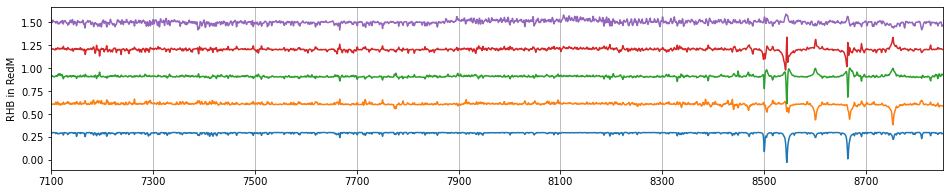

In [13]:
ds.init_pcp()

In [14]:
ds.flux.shape

(2100, 2204)

In [28]:
# k,q,prom = 10, 0.75, 0.1
k,q,prom = 5, 0.7, 0.02
peaks, prop, nvv= ds.get_peaks(k=k,q=q,prom=prom)

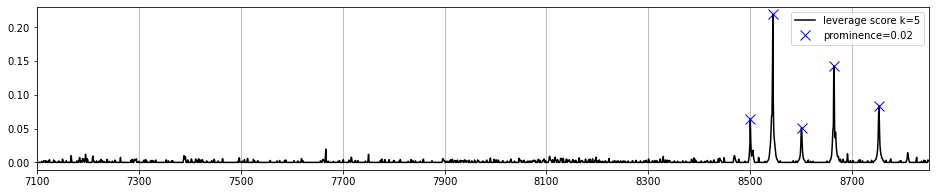

In [29]:
ds.plot_peaks(nvv, peaks, k, prom)

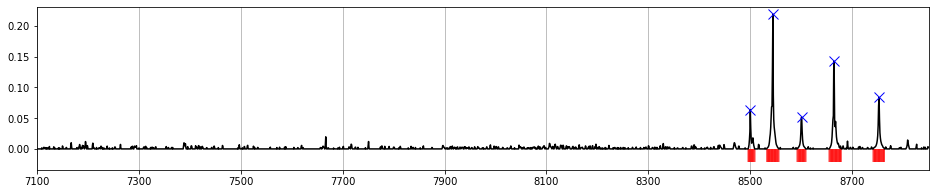

In [30]:
ds.plot_mask_from_peaks(peaks, prop, nvv)

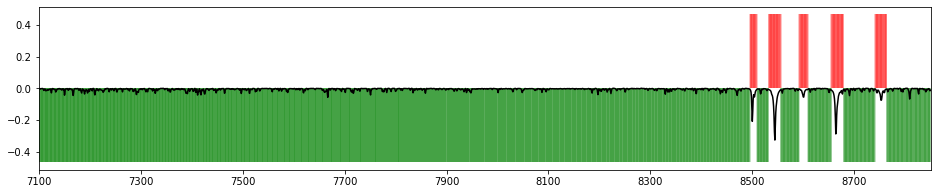

In [31]:
ds.plot_MN_mask(0)

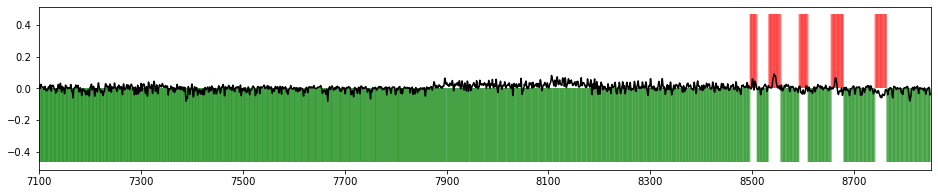

In [32]:
ds.plot_MN_mask(4)

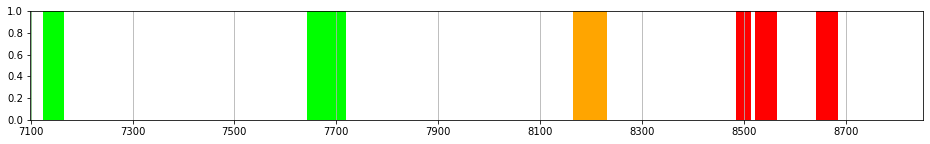

In [33]:
ds.plot_lick()

In [34]:
ds.get_MN(ds.nmask, top=5)

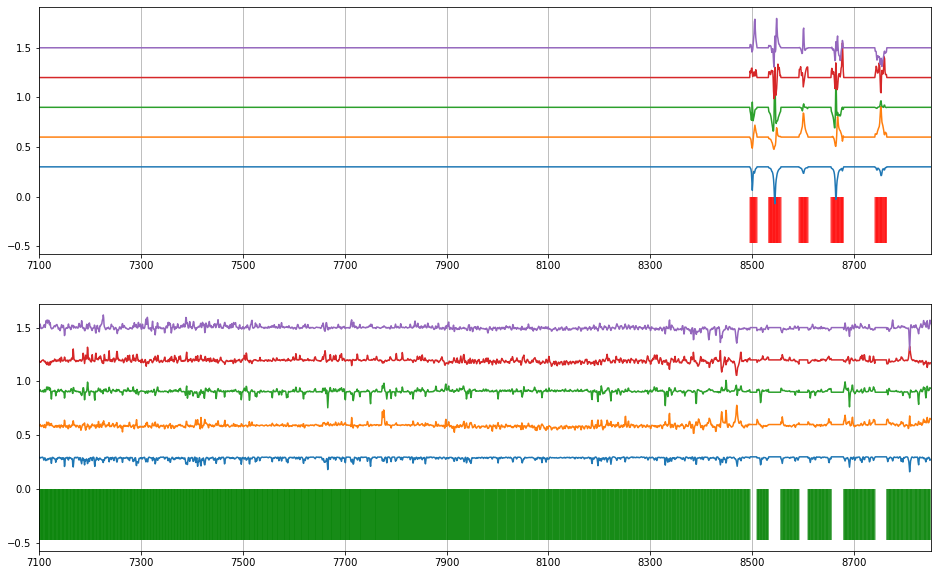

In [35]:
ds.plot_MN(step=0.3)

In [36]:
mu = 1.0 / ds.Mw[2]
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-5, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.12, lambda 0.0218, norm 10497.7


L(31, 118), S(30, 118)


(31, 2204)


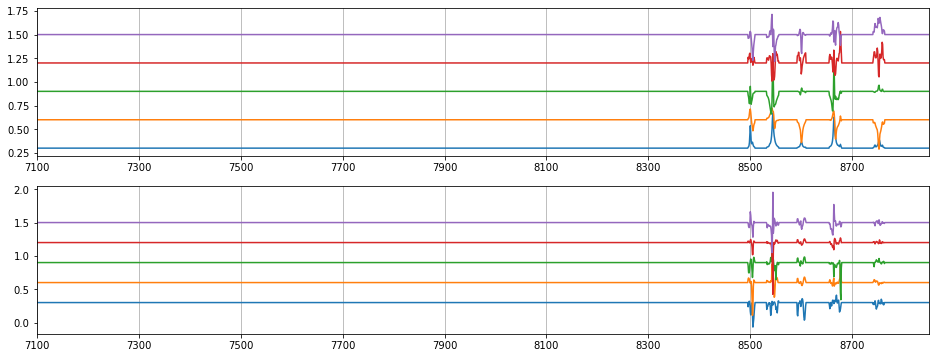

In [37]:
nMLv, nMSv =ds.eval_pcp(MLv, MSv)

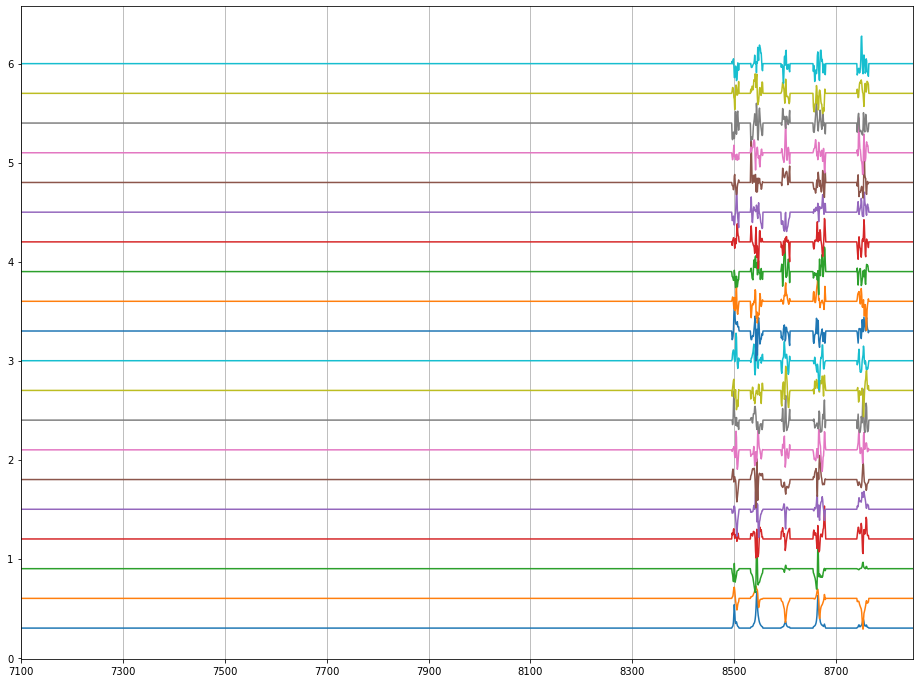

In [38]:
ds.plot_V(nMLv, top=20)

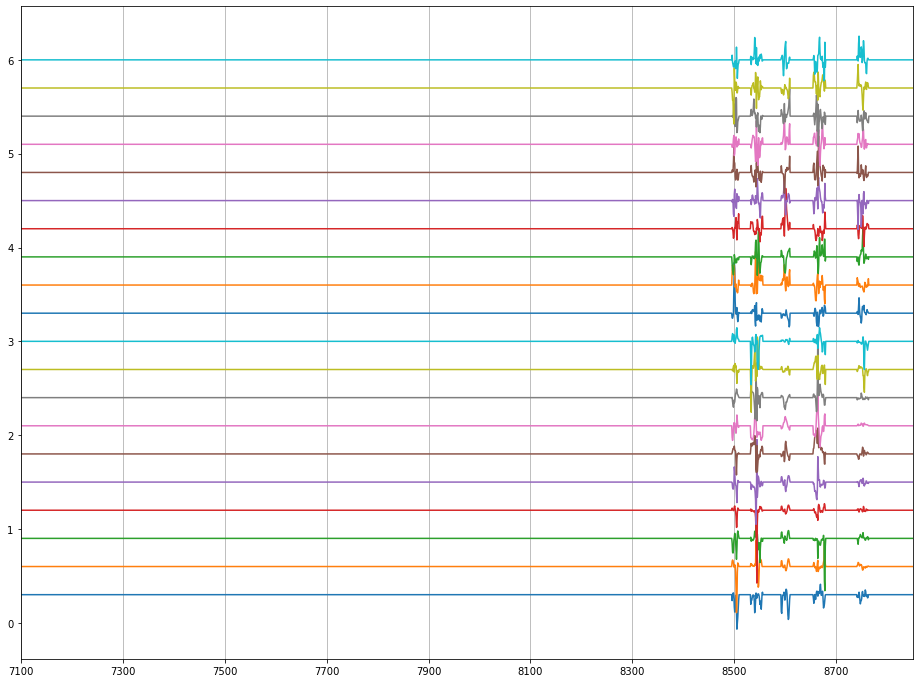

In [39]:
ds.plot_V(nMSv, top=20)

In [40]:
mu = 1.0 / ds.Nw[2]
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=mu, lam=None, norm=None, maxiter=200)

mu 0.14, lambda 0.0218, norm 3389.6


L(47, 2086), S(30, 2086)


(47, 2204)


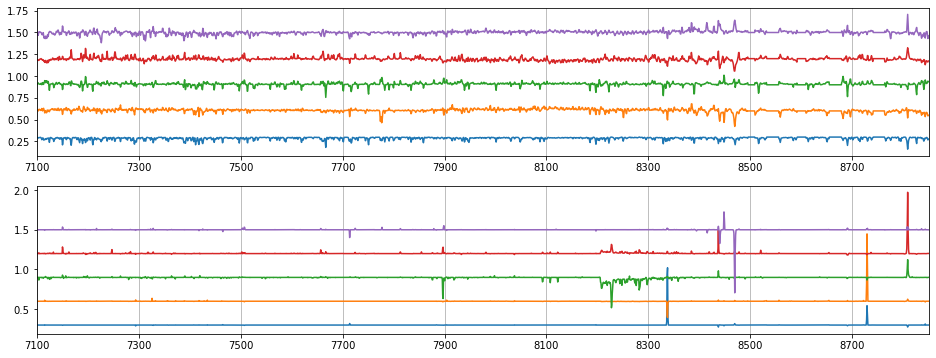

In [41]:
nNLv, nNSv = ds.eval_pcp(NLv, NSv, isM=0)

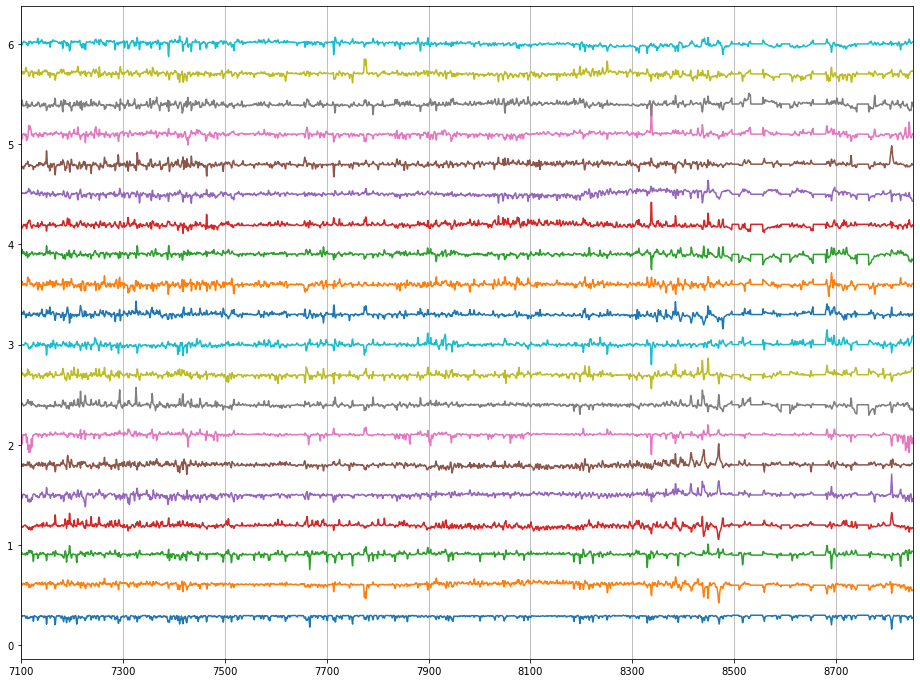

In [42]:
ds.plot_V(nNLv, top=20)

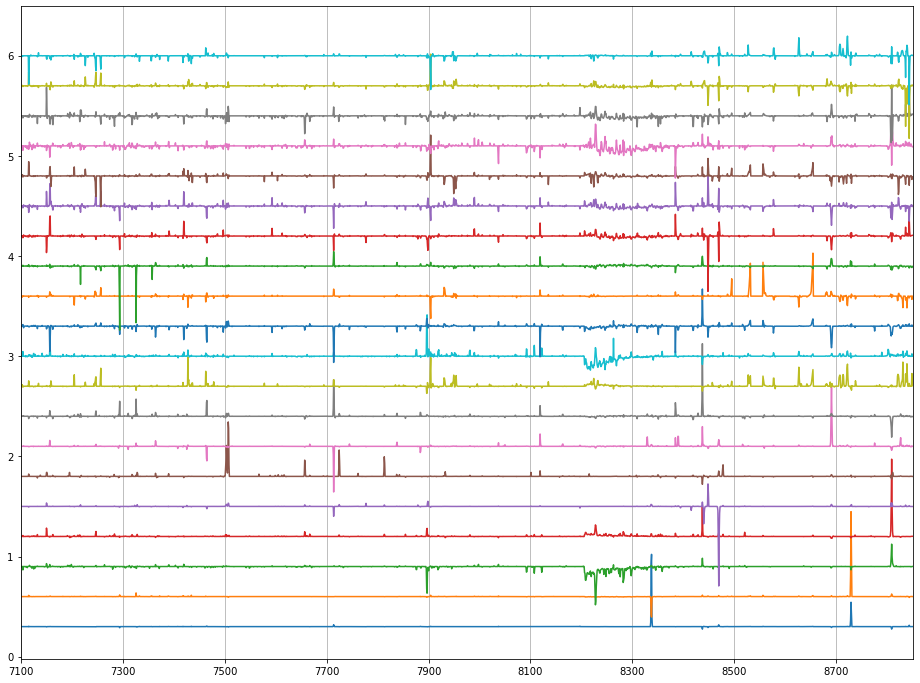

In [43]:
ds.plot_V(nNSv, top=20)

In [44]:
ds.pcp_transform(MLv, MSv, NLv, NSv, top=20)

In [45]:
ds.pcp_np(save=1)

/scratch/ceph/swei20/data/dnn/RHB/bosz_pcp.h5


# Get informative lines

In [46]:
ds.prepare_lines()

{1, 2, 3, 4, 7, 8, 11, 13, 14, 15, 20, 21, 22, 24, 25, 32, 34, 36, 37, 38}


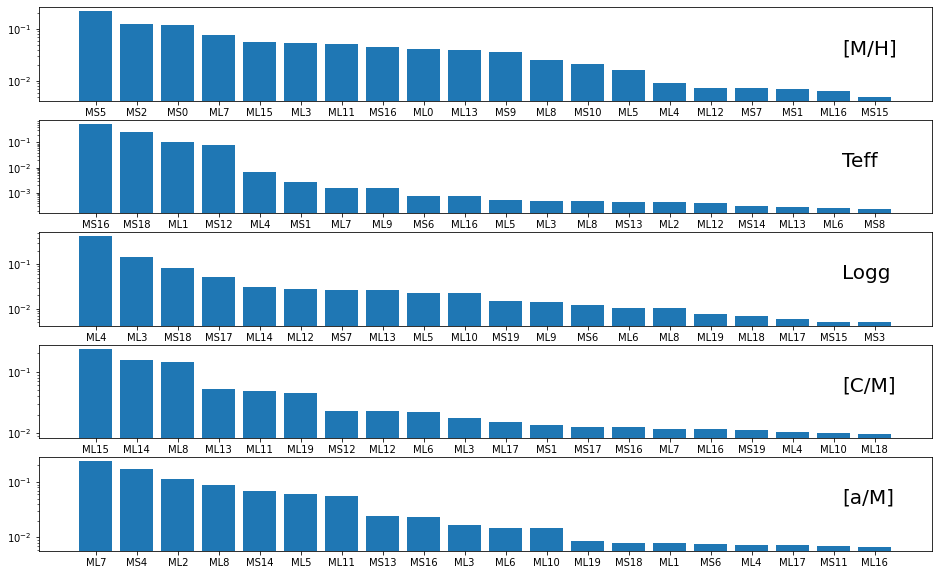

In [47]:
ds.get_all_Xrf(top=20, plot=1, X="M")

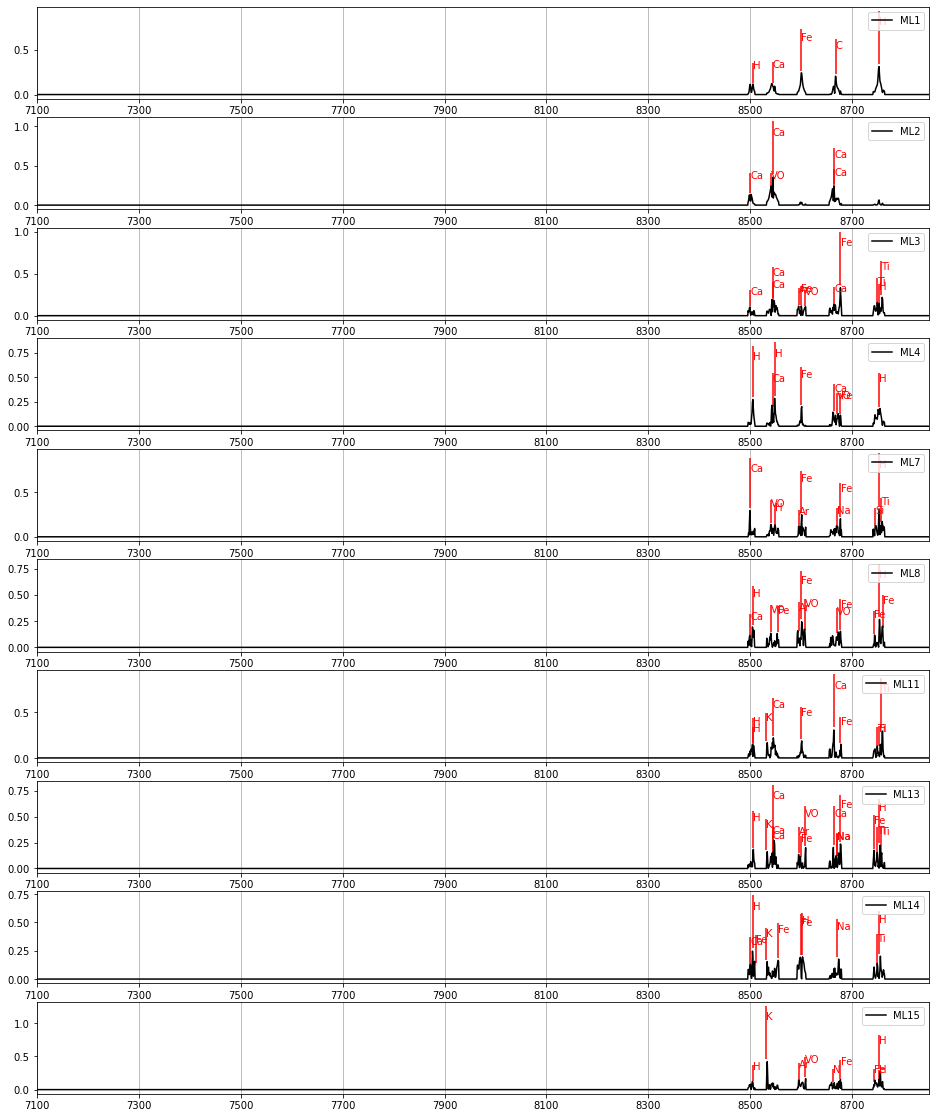

In [48]:
ds.plot_Xdx(top=10, X="M")

{1, 3, 4, 5, 6, 7, 10, 12, 16, 20, 22, 24, 25, 26, 28, 29, 34, 35, 38, 39}


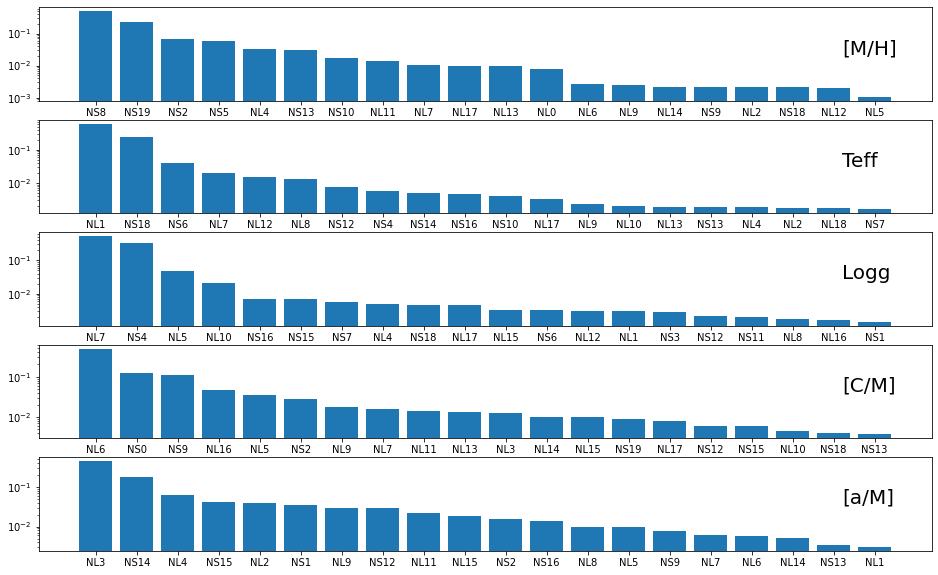

In [49]:
ds.get_all_Xrf(top=20, plot=1, X="N")

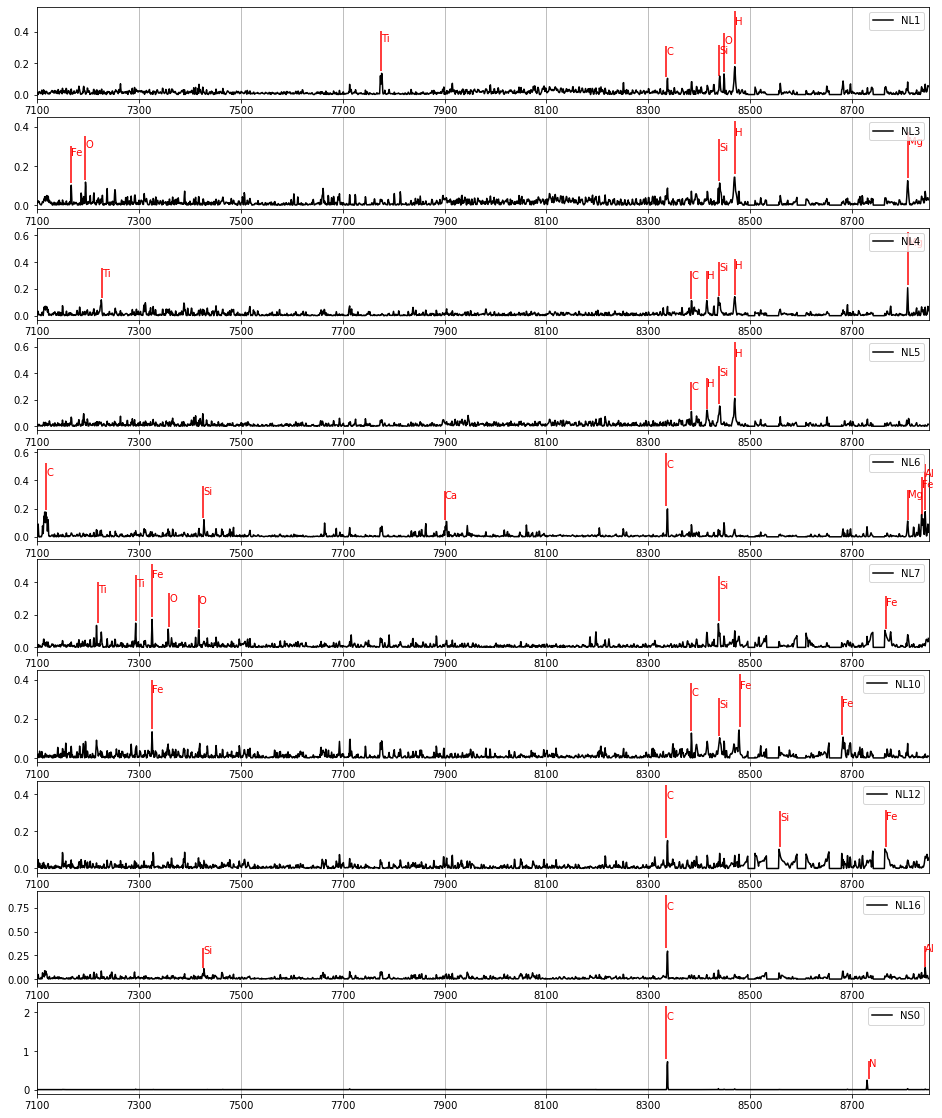

In [50]:
ds.plot_Xdx(top=10, X="N")

In [51]:
ds.save_dnn_rf()

In [58]:
AA = np.log(8850/7100)
AA

0.22032267497256833

- R = 50000, pixels = 22032, $\frac{\Delta\lambda}{\lambda}$ = 100k
- R = 5000 , pixles = 2204 , $\frac{\Delta\lambda}{\lambda}$ = 10k
- R = 500  , pixles = 220  , $\frac{\Delta\lambda}{\lambda}$ = 1k = $\frac{c}{V_r}$

In [61]:
0.4 / 0.4 * 2204

881.6

In [60]:
22032/ 0.22032

100000.0

In [56]:
pixels = AA / 8

In [57]:
pixels

0.02754033437157104